<a href="https://colab.research.google.com/github/SuranSandeepa/deep-learning-image-classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [4]:
#import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [5]:
#Load Dataset
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: suranuththamawadu
Your Kaggle Key: ··········


100%|██████████| 217M/217M [00:03<00:00, 62.4MB/s]


In [6]:
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)

In [7]:
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"

In [8]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [9]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [10]:
for image_batch , label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


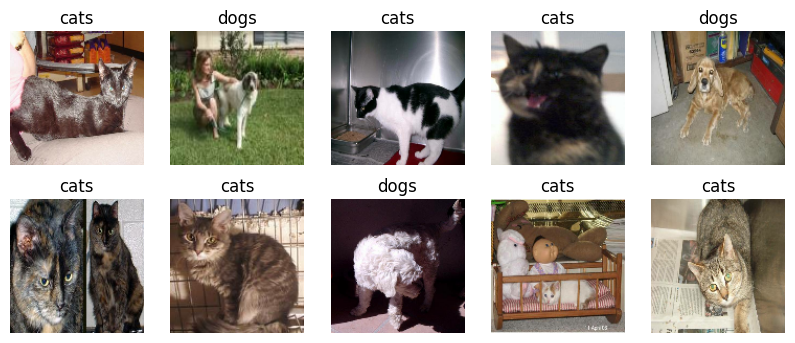

In [11]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [13]:
#Scaling Images
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[ 38.55078     21.550781    31.550781  ]
   [ 39.90625     22.90625     32.90625   ]
   [ 36.6875      19.6875      29.6875    ]
   ...
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]
   [  0.           0.           0.        ]]

  [[ 38.44922     21.449219    31.449219  ]
   [ 37.328125    20.328125    30.328125  ]
   [ 35.32422     18.324219    28.324219  ]
   ...
   [  0.           0.           0.        ]
   [  0.           0.32421875   0.        ]
   [  0.           0.           0.        ]]

  [[ 39.987534    22.987534    32.987534  ]
   [ 38.27568     21.27568     31.27568   ]
   [ 38.039062    21.039062    31.039062  ]
   ...
   [  1.           0.           0.        ]
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]]

  ...

  [[184.55377    171.84134    185.32405   ]
   [191.96484    179.41348    193.68916   ]
   [197.16423    183.4764     196.32031   ]
   ...
   [ 12.           1.   

In [14]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [15]:
#Scaling Images
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.33361313 0.3732118  0.46510825]
   [0.28804237 0.20327064 0.37857547]
   [0.3038884  0.16342941 0.37726966]
   ...
   [0.5541973  0.39748776 0.3320772 ]
   [0.54515934 0.3999081  0.337163  ]
   [0.53333336 0.40392157 0.3372549 ]]

  [[0.35903955 0.42570156 0.45473346]
   [0.33983907 0.2941083  0.4078691 ]
   [0.2924788  0.16569453 0.35958216]
   ...
   [0.5516391  0.4040288  0.33469668]
   [0.55417734 0.41420168 0.34738782]
   [0.5462929  0.4168811  0.34748775]]

  [[0.37059075 0.44638732 0.4476997 ]
   [0.36649793 0.38684884 0.43119627]
   [0.31189275 0.24541698 0.38218993]
   ...
   [0.551011   0.40784314 0.33628982]
   [0.5431222  0.41754007 0.3352484 ]
   [0.54509807 0.41960785 0.33532476]]

  ...

  [[0.8127298  0.7617494  0.73822   ]
   [0.8147212  0.7676624  0.72054225]
   [0.8104905  0.76343167 0.7085297 ]
   ...
   [0.8097607  0.7823097  0.75093716]
   [0.8090001  0.78933096 0.76578647]
   [0.79248106 0.7728732  0.75520056]]

  [[0.80693775 0.75595737 0.732427

In [16]:
#Data Augmentation

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

In [17]:
#Model Building
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [18]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [20]:
#Model Training

start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 [==============================] - 17s 41ms/step - loss: 0.6790 - accuracy: 0.5850 - val_loss: 0.7020 - val_accuracy: 0.5100
Epoch 2/20
225/225 [==============================] - 9s 39ms/step - loss: 0.6491 - accuracy: 0.6150 - val_loss: 0.6555 - val_accuracy: 0.5863
Epoch 3/20
225/225 [==============================] - 9s 39ms/step - loss: 0.6371 - accuracy: 0.6410 - val_loss: 0.8847 - val_accuracy: 0.5900
Epoch 4/20
225/225 [==============================] - 9s 40ms/step - loss: 0.6207 - accuracy: 0.6526 - val_loss: 0.7041 - val_accuracy: 0.6200
Epoch 5/20
225/225 [==============================] - 10s 42ms/step - loss: 0.6010 - accuracy: 0.6769 - val_loss: 0.5887 - val_accuracy: 0.6750
Epoch 6/20
225/225 [==============================] - 10s 44ms/step - loss: 0.5900 - accuracy: 0.6836 - val_loss: 0.7946 - val_accuracy: 0.6300
Epoch 7/20
225/225 [==============================] - 9s 39ms/step - loss: 0.5756 - accuracy: 0.6953 - val_loss: 0.5582 - val_accuracy: 0.7

In [21]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 209.516 seconds


In [22]:
history.history

{'loss': [0.6790043115615845,
  0.6491180658340454,
  0.6370896697044373,
  0.6206544041633606,
  0.6010017395019531,
  0.5899850726127625,
  0.5755659937858582,
  0.5593836903572083,
  0.5517504811286926,
  0.5376754999160767,
  0.5276422500610352,
  0.5205323696136475,
  0.49145036935806274,
  0.4872744381427765,
  0.4774118661880493,
  0.4683912396430969,
  0.4614793360233307,
  0.4519991874694824,
  0.4457830488681793,
  0.44141659140586853],
 'accuracy': [0.5849999785423279,
  0.6150000095367432,
  0.6409721970558167,
  0.6526389122009277,
  0.6769444346427917,
  0.6836110949516296,
  0.695277750492096,
  0.7087500095367432,
  0.7134722471237183,
  0.7277777791023254,
  0.7347221970558167,
  0.7429166436195374,
  0.7601388692855835,
  0.7648611068725586,
  0.7693055272102356,
  0.778333306312561,
  0.7833333611488342,
  0.788611114025116,
  0.788611114025116,
  0.788611114025116],
 'val_loss': [0.7020103931427002,
  0.6554949879646301,
  0.884684681892395,
  0.7040776014328003,
  

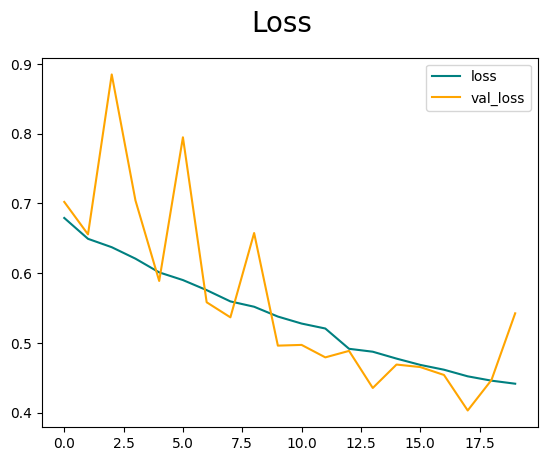

In [23]:
#Performance Analysis
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

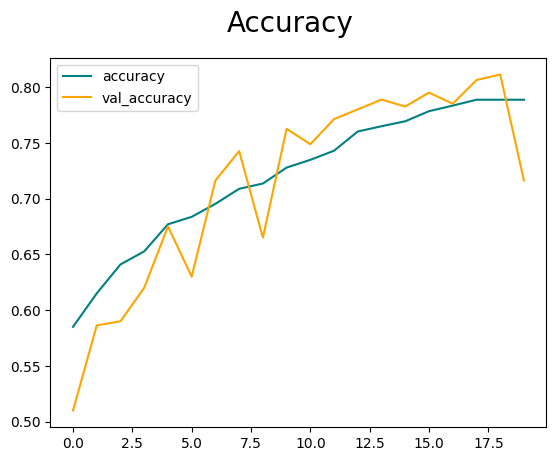

In [24]:

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [25]:
#Model Evaluation

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [26]:

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)


1/1 [==============================] - 0s 367ms/step


In [27]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.62294>

In [28]:

recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.945>

In [29]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6865>

In [30]:
!pip install opencv-python -q

In [31]:

import cv2

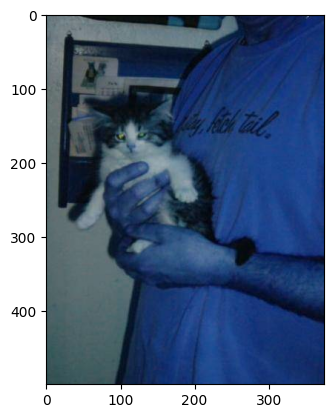

In [32]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4002.jpg')
plt.imshow(img)
plt.show()

In [33]:

resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255


In [34]:
scaled_image.shape

TensorShape([128, 128, 3])

In [35]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [36]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 212ms/step


In [37]:
yhat

array([[0.6834412]], dtype=float32)

In [38]:
class_names

['cats', 'dogs']

In [42]:
if yhat >= 0.5:
    print(class_names[1])
else:
    print(class_names[0])

dogs


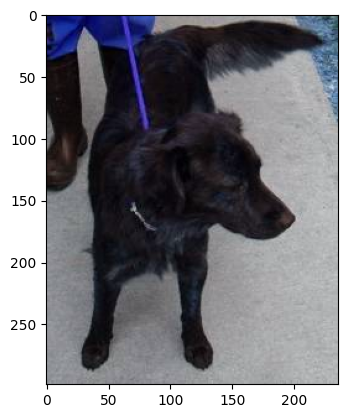

In [43]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4007.jpg')
plt.imshow(img)
plt.show()

In [44]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [45]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 30ms/step


In [46]:
yhat

array([[0.6878957]], dtype=float32)

In [47]:
if yhat >= 0.5:
    print(class_names[1])
else:
    print(class_names[0])

dogs


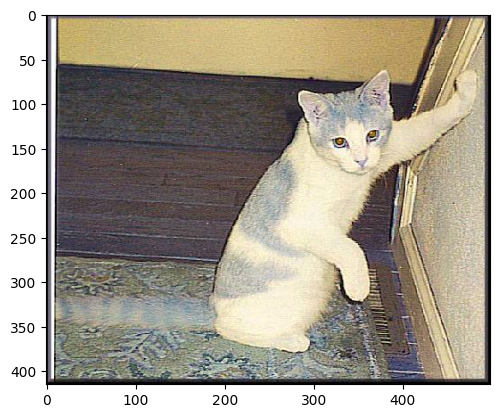

In [52]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4001.jpg')
plt.imshow(img)
plt.show()

In [53]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [54]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 19ms/step


In [55]:
yhat

array([[0.9868911]], dtype=float32)

In [57]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs
